In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/abdallahalidev/plantvillage-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: byashaqiqie
Your Kaggle Key: ··········


100%|██████████| 2.04G/2.04G [00:22<00:00, 97.6MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install split_folders
import splitfolders

In [ ]:
input_folder="/content/drive/MyDrive/projek/dataset" 
base_dir="/content/drive/MyDrive/projek/dataset_split"

In [ ]:
%cd /content/drive/MyDrive/projek/dataset
!ls -a

/content/drive/MyDrive/projek/dataset
cercospora  commonrust	normal	northernleafblight


In [ ]:

splitfolders.ratio(input= input_folder, output= base_dir, seed=1337, ratio=(0.7, 0.3))

Copying files: 3852 files [00:53, 71.77 files/s]


In [ ]:
import os
base_dir = '/content/drive/MyDrive/projek/dataset_split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_cercospora_dir = os.path.join(train_dir, 'cercospora')
train_commonrust_dir = os.path.join(train_dir, 'commonrust')
train_normal_dir = os.path.join(train_dir, 'normal')
train_northernleaf_dir = os.path.join(train_dir, 'northernleaf')

validation_cercospora_dir = os.path.join(validation_dir, 'cercospora')
validation_commonrust_dir = os.path.join(validation_dir, 'commonrust')
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_northernleaf_dir = os.path.join(validation_dir, 'northernleaf')

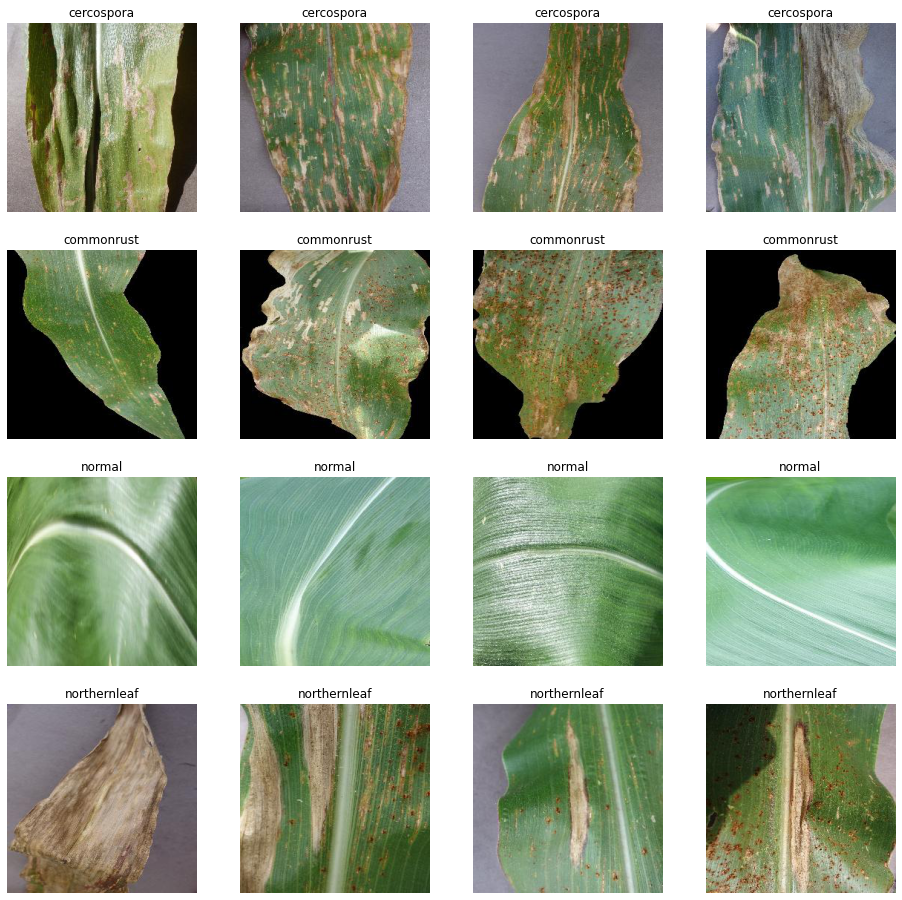

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
cercospora_img = [os.path.join(train_cercospora_dir, fname) 
                for fname in os.listdir(train_cercospora_dir)[pic_index-4:pic_index]]
commonrust_img  = [os.path.join(train_commonrust_dir, fname) 
                for fname in os.listdir(train_commonrust_dir)[pic_index-4:pic_index]]
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
northernleaf_img  = [os.path.join(train_northernleaf_dir, fname) 
                for fname in os.listdir(train_northernleaf_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(cercospora_img+commonrust_img+normal_img+northernleaf_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg"and".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg"and".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1769, 150, 150, 3)
Train Label =  (1769,)
Validation Data =  (760, 150, 150, 3)
Validation Label =  (760,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [157 144 142]
Data setelah di-normalisasi  [0.6156863 0.5647059 0.5568628]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label)

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_val)

Label sebelum di-encoder  ['cercospora' 'cercospora' 'cercospora' ... 'normal' 'normal' 'normal']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 